# Network drawing for comparing
###### 10.08.2023

In [50]:
import pandas as pd, networkx as nx, csv, matplotlib.pyplot as plt, community, matplotlib.cm as cm

ciaa = pd.read_csv('../data/cleaned/CIAA-CIAA_m2.csv', sep=';')
dcfs = pd.read_csv('../data/cleaned/DCFS-DCFS_m2.csv', sep=';')

ciaa_dynamic = {year: ciaa.loc[ciaa['Year']<=year] for year in range(1996,2023) if year != 2020}
dcfs_dynamic = {year: dcfs.loc[dcfs['Year']<=year] for year in range(2001,2023)}

def plot_network_series(years, graphs, venue):
    plt.figure(figsize=(10,15))
    #years = sorted(years)
    pos = nx.spring_layout(graphs[years[-1]])
    giant_component = sorted(list(nx.connected_components(graphs[years[0]])),key=len,reverse=True)[0]
    color_map = ['red' if node in giant_component else 'gray' for node in graphs[years[0]].nodes()]
    node_sizes = [35 * graphs[years[0]].nodes[node]['weight'] for node in graphs[years[0]].nodes()]
    nx.draw_networkx(graphs[years[0]], pos, node_color=color_map, node_size=node_sizes, with_labels=False)
    plt.savefig('../../Figures/'+venue+str(years[0])+'-b.png', bbox_inches='tight')
    last_nodes = graphs[years[0]].nodes()
    last_largest_component = giant_component
    for i in range(1,len(years)):
        plt.figure(figsize=(10,15))
        nodes = graphs[years[i]].nodes()
        pos_now = {key: value for key,value in pos.items() if key in graphs[years[i]].nodes()}
        giant_component = sorted(list(nx.connected_components(graphs[years[i]])),key=len,reverse=True)[0]
        color_map = []
        for node in nodes:
            if node in giant_component:
                if node in last_largest_component: color_map.append('red')
                elif node not in last_nodes: 
                    color_map.append('blue')
                else: color_map.append('orange')
            elif node not in last_nodes: 
                color_map.append('blue')
            else: color_map.append('gray')
        node_sizes = [35 * graphs[years[i]].nodes[node]['weight'] for node in graphs[years[i]].nodes()]
        nx.draw_networkx(graphs[years[i]], pos_now, node_color=color_map, node_size=node_sizes, with_labels=False)
        plt.savefig('../../Figures/'+venue+str(years[i])+'-b.png', bbox_inches='tight')    
        last_nodes = graphs[years[i]].nodes()
        last_largest_component = giant_component
    # nodes = list(graphs[years[0]].nodes())
    # weight = {node: authors.count(node) for node in nodes}
    # nx.set_node_attributes(gra, weight, 'weight')

In [51]:
# plot = False
# no_authors = []
# year = 1996
# ciaa_graphs = []
# diameters = []
# no_nodes = []
ciaa_graphs = {}
for year, conference in ciaa_dynamic.items():
    authors = conference['Author'].to_list()
    co_authors = conference['Co-Authors'].to_list()    
    G = nx.Graph()
    G.add_nodes_from(set(authors))
    nodes = list(G.nodes())
    weight = {node: authors.count(node) for node in nodes}
    nx.set_node_attributes(G, weight, 'weight')

    for i in range(len(authors)):    
        entries = co_authors[i].replace('[','').replace(']','').replace('"','').replace("'",'') 
        if entries != '':
            entries = entries.split(', ')
            for entry in entries:
                G.add_edge(authors[i],entry)
    #no_authors.append(G.number_of_nodes())
    ciaa_graphs[year] = G

dcfs_graphs = {}
for year, conference in dcfs_dynamic.items():
    authors = conference['Author'].to_list()
    co_authors = conference['Co-Authors'].to_list()    
    G = nx.Graph()
    G.add_nodes_from(set(authors))
    nodes = list(G.nodes())
    weight = {node: authors.count(node) for node in nodes}
    nx.set_node_attributes(G, weight, 'weight')

    for i in range(len(authors)):    
        entries = co_authors[i].replace('[','').replace(']','').replace('"','').replace("'",'') 
        if entries != '':
            entries = entries.split(', ')
            for entry in entries:
                G.add_edge(authors[i],entry)
    #no_authors.append(G.number_of_nodes())
    dcfs_graphs[year] = G

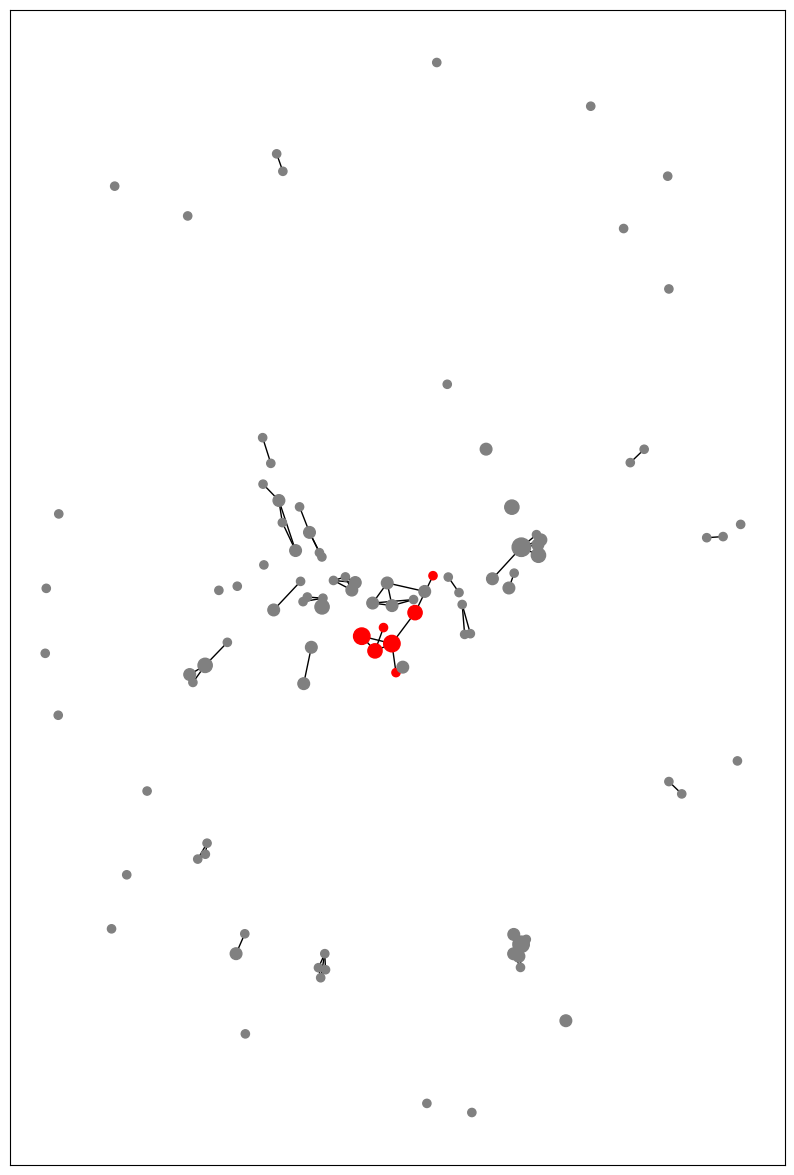

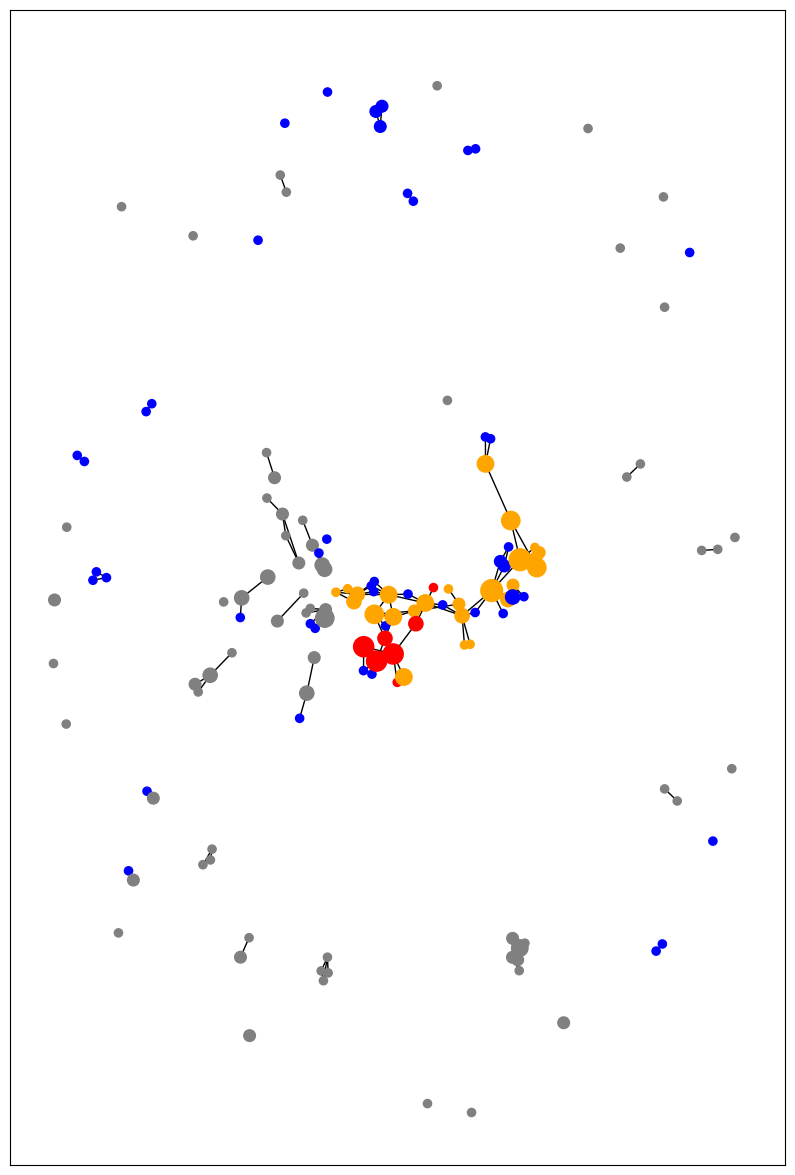

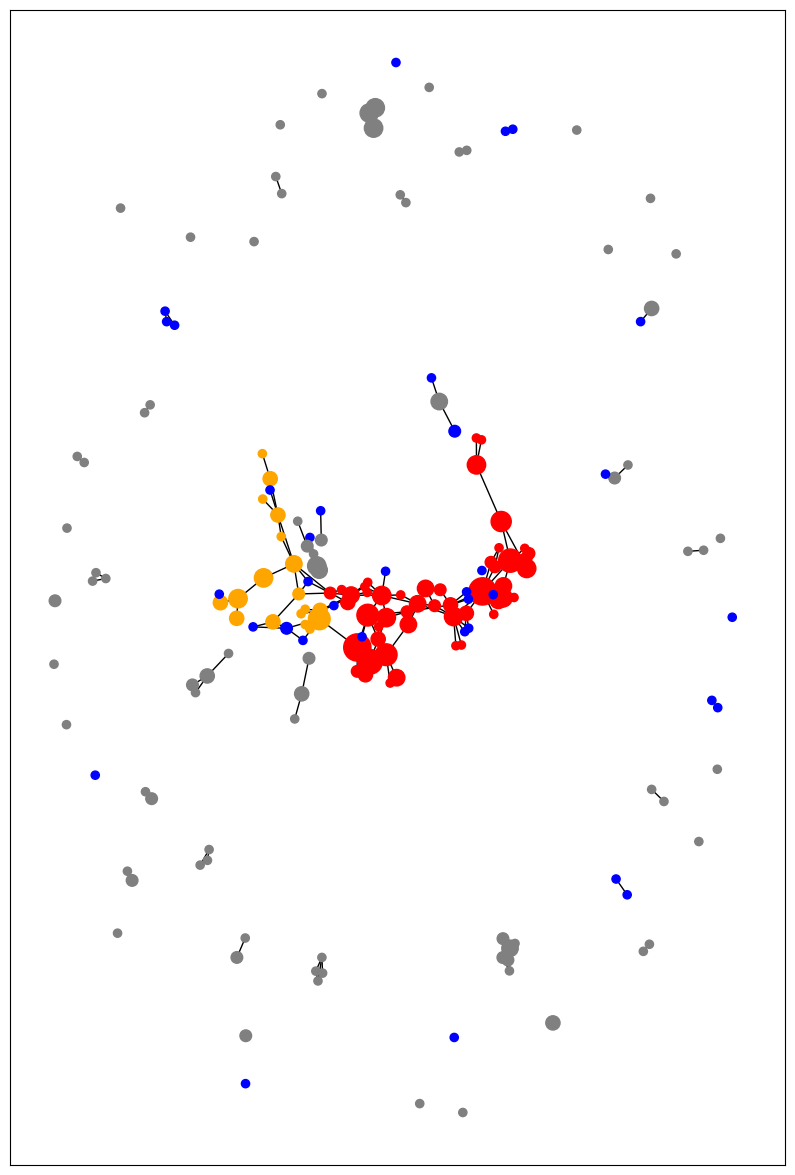

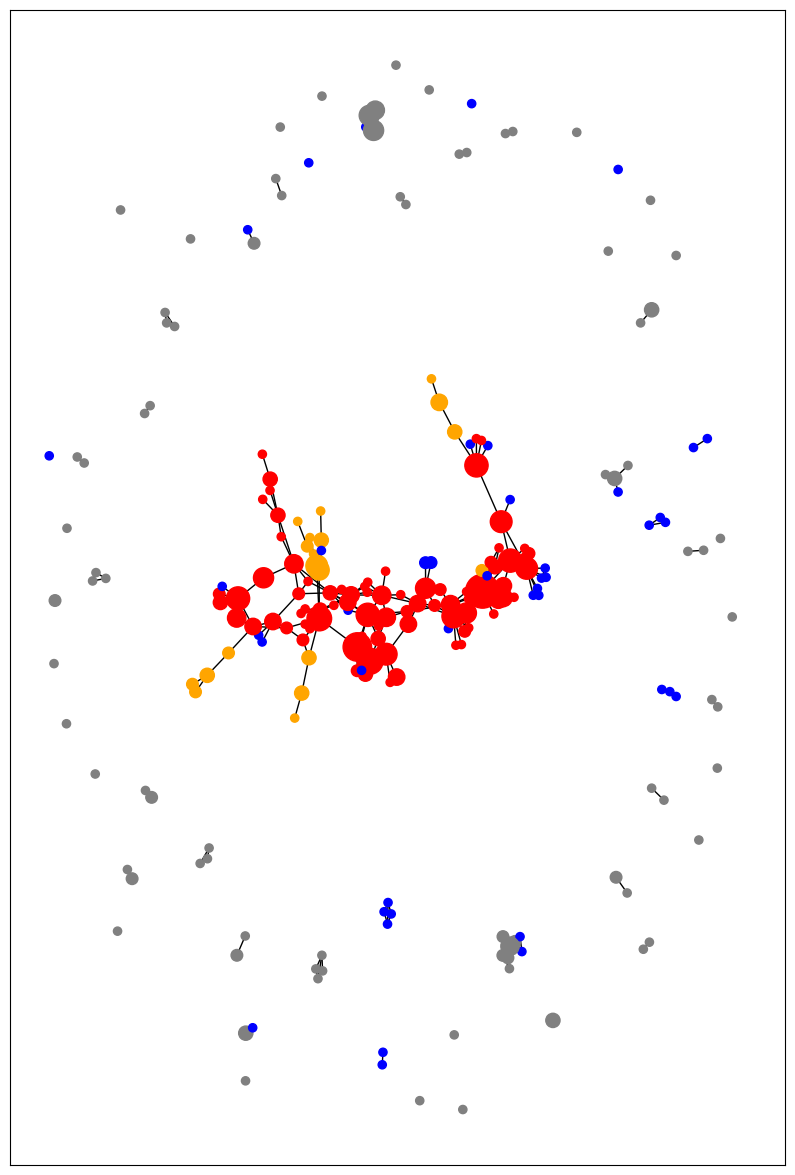

In [52]:
plot_network_series([2004,2006,2009,2011],dcfs_graphs,'DCFS')